In [92]:
! pip install yahoo_fin
! pip install arch

import warnings
warnings.simplefilter("ignore")

import pandas as pd
import scipy.stats as stat
import scipy
import datetime
import numpy as np
import matplotlib.pyplot as plt
from arch.unitroot import VarianceRatio
from yahoo_fin.stock_info import *



start = datetime.datetime(2018,1,1)
end = datetime.datetime(2022,1,1)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
stock_tesla = get_data('TSLA' , start_date = start, end_date = end)

stock_tesla.head()

stock_tesla=stock_tesla.dropna()
close_tesla = pd.DataFrame(stock_tesla["close"]).dropna()
simple_return_tesla = close_tesla.pct_change().dropna()
log_return_tesla = np.log(1+simple_return_tesla)

In [82]:
stock_etherum = get_data('ETH-USD' , start_date = start, end_date = end)

stock_etherum.head()

stock_etherum=stock_etherum.dropna()
close_etherum = pd.DataFrame(stock_etherum["close"]).dropna()
simple_return_etherum = close_etherum.pct_change().dropna()
log_return_etherum = np.log(1+simple_return_etherum)

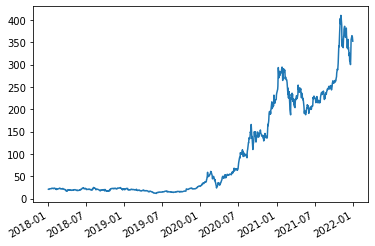

In [83]:
stock_tesla["close"].plot(grid = False)

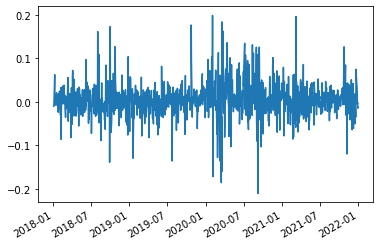

In [84]:
simple_return_tesla["close"].plot(grid = False)

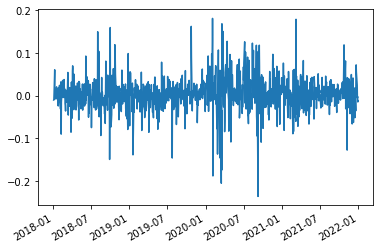

In [85]:
log_return_tesla["close"].plot(grid = False)

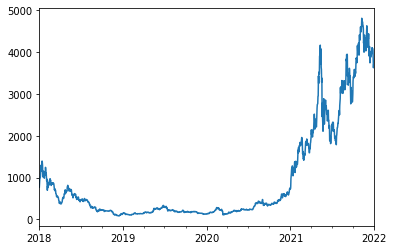

In [86]:
stock_etherum["close"].plot(grid = False)

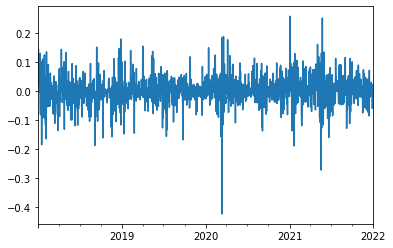

In [87]:
simple_return_etherum["close"].plot(grid = False)

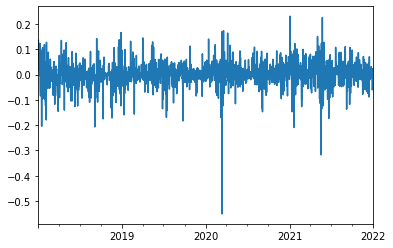

In [88]:
log_return_etherum["close"].plot(grid = False)

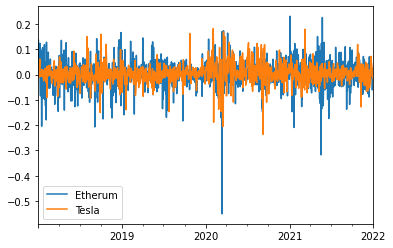

In [89]:
log_return_etherum["close"].plot(label = 'Etherum', grid = False)
log_return_tesla["close"].plot(label = 'Tesla', grid = False)
plt.legend()

Populating the interactive namespace from numpy and matplotlib


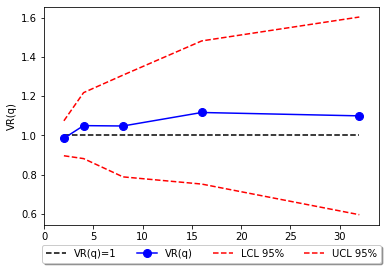

In [93]:
x_tesla = np.asarray(close_tesla)
x_tesla = np.log(x_tesla)
N_tesla=len(x_tesla)
vr_1_tesla=[]
vrt_tesla = []
w_tesla=[]
varvrt_tesla = []
zvrt_tesla = []
q_tesla = []
lcl_tesla=[]
ucl_tesla=[]
vr_1_tesla=[]
p_value_tesla=[]
stderr_tesla=[]
alpha_tesla=0.05
k_tesla=5

def VRTest():
    for ii in range (1, k_tesla+1):
        a_tesla=2**ii
        q_tesla.append(a_tesla)
        vr_tesla = VarianceRatio(x_tesla, a_tesla)
        vrt_tesla.append(vr_tesla.vr)
        se_tesla=np.sqrt(vr_tesla._stat_variance)/np.sqrt(vr_tesla._nobs-1)
        stderr_tesla.append(se_tesla)
        lower_tesla=vr_tesla.vr-stat.norm.ppf(1-alpha_tesla/2)*se_tesla
        upper_tesla=vr_tesla.vr+stat.norm.ppf(1-alpha_tesla/2)*se_tesla
        one_tesla=1
        zvrt_tesla.append(vr_tesla.stat)
        lcl_tesla.append(lower_tesla)
        ucl_tesla.append(upper_tesla)
        vr_1_tesla.append(one_tesla)
        p_value_tesla.append(vr_tesla.pvalue)

    return vrt_tesla, p_value_tesla, zvrt_tesla, q_tesla, stderr_tesla
VRTest()

confidence_tesla=1-alpha_tesla
%pylab inline
#pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
#plt.ylim(min(lcl), max(ucl))
plt.xlim(0, 2**k_tesla+2)
plt.xlabel( 'q' )
plt.ylabel( 'VR(q)' )
plt.plot(q_tesla, vr_1_tesla,color='black', linestyle='dashed', label='VR(q)=1')
plt.plot(q_tesla, vrt_tesla, color='blue', marker='o',markerfacecolor='blue', markersize=8,label='VR(q)')
plt.plot(q_tesla, lcl_tesla,color='red', linestyle='dashed', label='LCL ' +str('{:.0%}'.format(confidence_tesla)))
plt.plot(q_tesla, ucl_tesla,color='red', linestyle='dashed', label='UCL ' +str('{:.0%}'.format(confidence_tesla)))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07),fancybox=True, shadow=True, ncol=5)

plt.show()

Populating the interactive namespace from numpy and matplotlib


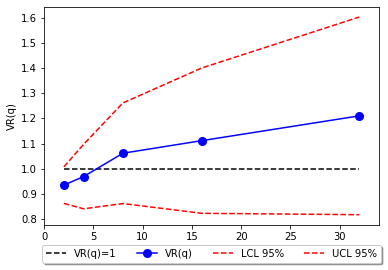

In [94]:
x_etherum = np.asarray(close_etherum)
x_etherum = np.log(x_etherum)
N_etherum=len(x_etherum)
vr_1_etherum=[]
vrt_etherum = []
w_etherum=[]
varvrt_etherum = []
zvrt_etherum = []
q_etherum = []
lcl_etherum=[]
ucl_etherum=[]
vr_1_etherum=[]
p_value_etherum=[]
stderr_etherum=[]
alpha_etherum=0.05
k_etherum=5

def VRTest():
    for ii in range (1, k_etherum+1):
        a_etherum=2**ii
        q_etherum.append(a_etherum)
        vr_etherum = VarianceRatio(x_etherum, a_etherum)
        vrt_etherum.append(vr_etherum.vr)
        se_etherum=np.sqrt(vr_etherum._stat_variance)/np.sqrt(vr_etherum._nobs-1)
        stderr_etherum.append(se_etherum)
        lower_etherum=vr_etherum.vr-stat.norm.ppf(1-alpha_etherum/2)*se_etherum
        upper_etherum=vr_etherum.vr+stat.norm.ppf(1-alpha_etherum/2)*se_etherum
        one_etherum=1
        zvrt_etherum.append(vr_etherum.stat)
        lcl_etherum.append(lower_etherum)
        ucl_etherum.append(upper_etherum)
        vr_1_etherum.append(one_etherum)
        p_value_etherum.append(vr_etherum.pvalue)

    return vrt_etherum, p_value_etherum, zvrt_etherum, q_etherum, stderr_etherum
VRTest()

confidence_etherum=1-alpha_etherum
%pylab inline
#pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
#plt.ylim(min(lcl), max(ucl))
plt.xlim(0, 2**k_etherum+2)
plt.xlabel( 'q' )
plt.ylabel( 'VR(q)' )
plt.plot(q_etherum, vr_1_etherum,color='black', linestyle='dashed', label='VR(q)=1')
plt.plot(q_etherum, vrt_etherum, color='blue', marker='o',markerfacecolor='blue', markersize=8,label='VR(q)')
plt.plot(q_etherum, lcl_etherum,color='red', linestyle='dashed', label='LCL ' +str('{:.0%}'.format(confidence_tesla)))
plt.plot(q_etherum, ucl_etherum,color='red', linestyle='dashed', label='UCL ' +str('{:.0%}'.format(confidence_tesla)))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07),fancybox=True, shadow=True, ncol=5)

plt.show()

In [99]:
results_tesla=pd.DataFrame(columns=['q','VR test', 'Std. Error','z statistic', 'P-value'])
results_tesla['q']=q_tesla
results_tesla['VR test']=vrt_tesla
results_tesla['Std. Error']=stderr_tesla
results_tesla['z statistic']=zvrt_tesla
results_tesla['P-value']=p_value_tesla

In [100]:
results_tesla

,q,VR test,Std. Error,z statistic,P-value
0,2,0.985743,0.045420,-0.313890,0.753605
1,4,1.050267,0.085723,0.586380,0.557620
2,8,1.048348,0.132234,0.365623,0.714646
3,16,1.117130,0.186034,0.629618,0.528944
4,32,1.099967,0.256869,0.389177,0.697145


In [101]:
results_etherum=pd.DataFrame(columns=['q','VR test', 'Std. Error','z statistic', 'P-value'])
results_etherum['q']=q_etherum
results_etherum['VR test']=vrt_etherum
results_etherum['Std. Error']=stderr_etherum
results_etherum['z statistic']=zvrt_etherum
results_etherum['P-value']=p_value_etherum

In [102]:
results_etherum

,q,VR test,Std. Error,z statistic,P-value
0,2,0.935489,0.036935,-1.746620,0.080703
1,4,0.969323,0.065199,-0.470516,0.637986
2,8,1.061929,0.101827,0.608179,0.543069
3,16,1.111772,0.146966,0.760526,0.446941
4,32,1.210059,0.199932,1.050653,0.293418


Observăm că probabilitatea aferentă testului este mai mare decât pragul de semnificație pentru toți q => acceptăm ipoteza nulă, adică atât tesla, cât și etherum îndeplinesc condiția de random walk

In [103]:
z=abs(results_tesla["z statistic"]).max()
alpha_star=1-(1-alpha_tesla)**(1/k_tesla)
alpha_star
z_star=stat.norm.ppf(1-alpha_star/2)
z_star

mvr=pd.DataFrame(columns=['z Statistic','Critical z','Decision'])
mvr.at[0,'z Statistic']=z
mvr['Critical z']=z_star
if z<z_star:
    mvr['Decision']="Cannot reject the null hypothesis of random walk"
else:
    mvr['Decision']="Reject the null hypothesis of random walk"
mvr

,z Statistic,Critical z,Decision
0,0.629618,2.568763,Cannot reject the null hypothesis of random walk


In [104]:
z=abs(results_etherum["z statistic"]).max()
alpha_star=1-(1-alpha_etherum)**(1/k_etherum)
alpha_star
z_star=stat.norm.ppf(1-alpha_star/2)
z_star

mvr=pd.DataFrame(columns=['z Statistic','Critical z','Decision'])
mvr.at[0,'z Statistic']=z
mvr['Critical z']=z_star
if z<z_star:
    mvr['Decision']="Cannot reject the null hypothesis of random walk"
else:
    mvr['Decision']="Reject the null hypothesis of random walk"
mvr

,z Statistic,Critical z,Decision
0,1.74662,2.568763,Cannot reject the null hypothesis of random walk


Se acceptă ipoteza de random walk pentru ambele active financiare.

In [105]:
cov1=np.zeros((k_tesla,k_tesla))

q=np.asarray(q_tesla)

for i in range (0,k_tesla-1):
    for j in range (i+1,k_tesla):
        cov1[i][j]=2*(3*q[j]-q[i]-1)*(q[i]-1)/(3*q[j])
cov2=np.transpose(cov1)
cov=cov1+cov2

for i in range (0,k_tesla):
    #for j in range (i+1,k):
  
    cov[i][i]=2*(2*q[i]-1)*(q[i]-1)/(3*q[i])
    
Wald_Test=np.matmul(np.asarray(vrt_tesla)-1,np.linalg.inv(cov))
                    
Wald_Test=N_tesla*np.matmul(Wald_Test,np.transpose(np.asarray(vrt_tesla)-1))

p_val= 1-stat.chi2.cdf(Wald_Test,k_tesla)

mvrw=pd.DataFrame(columns=['Wald Test','Critical Chi2','P-value','Decision'])
mvrw.at[0,'Wald Test']=Wald_Test
mvrw['Critical Chi2']=stat.chi2.ppf(alpha_tesla/2,k_tesla)
mvrw['P-value']=p_val
if p_val>0.05:
    mvrw['Decision']="Cannot reject the null hypothesis of random walk"
else:
    mvrw['Decision']="Reject the null hypothesis of random walk"
mvrw

,Wald Test,Critical Chi2,P-value,Decision
0,8.192571,0.831212,0.145937,Cannot reject the null hypothesis of random walk


In [106]:
cov1=np.zeros((k_etherum,k_etherum))

q=np.asarray(q_etherum)

for i in range (0,k_etherum-1):
    for j in range (i+1,k_etherum):
        cov1[i][j]=2*(3*q[j]-q[i]-1)*(q[i]-1)/(3*q[j])
cov2=np.transpose(cov1)
cov=cov1+cov2

for i in range (0,k_etherum):
    #for j in range (i+1,k):
  
    cov[i][i]=2*(2*q[i]-1)*(q[i]-1)/(3*q[i])
    
Wald_Test=np.matmul(np.asarray(vrt_tesla)-1,np.linalg.inv(cov))
                    
Wald_Test=N_tesla*np.matmul(Wald_Test,np.transpose(np.asarray(vrt_etherum)-1))

p_val= 1-stat.chi2.cdf(Wald_Test,k_etherum)

mvrw=pd.DataFrame(columns=['Wald Test','Critical Chi2','P-value','Decision'])
mvrw.at[0,'Wald Test']=Wald_Test
mvrw['Critical Chi2']=stat.chi2.ppf(alpha_etherum/2,k_etherum)
mvrw['P-value']=p_val
if p_val>0.05:
    mvrw['Decision']="Cannot reject the null hypothesis of random walk"
else:
    mvrw['Decision']="Reject the null hypothesis of random walk"
mvrw

,Wald Test,Critical Chi2,P-value,Decision
0,2.102098,0.831212,0.834845,Cannot reject the null hypothesis of random walk


Se acceptă ipoteza de random walk pentru ambele active financiare.